In [1]:
import numpy as np # always need it
import scipy as sp # often use it
import pylab as pl # do the plots
import matplotlib.pyplot as plt # for pretty plots
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm as tqdm

In [52]:
def Wasserstein_barycentre(mu_i, alpha, Ht, a, ent_sharp = False, N = 1):
    n1,n2,n3 = mu_i[0].shape
    k = len(mu_i)
    d = np.zeros((k, n1, n2, n3))
    v = np.ones((k,n1,n2,n3))
    w = np.ones((k,n1,n2,n3))
    mu = np.ones((n1,n2,n3))
    for j in range(N):
        mu = np.ones((n1,n2,n3))
        for i in range(k):
            w[i] = mu_i[i]/(Ht @ (a*v[i]))
            d[i] = v[i]*(Ht@(a*w[i]))
            mu = mu*(d[i]**alpha[i])

        #entropic sharpening, optional
        if (ent_sharp):
            H_0 = H0(mu_i, a)
            mu = entropic_sharpening(mu, H_0, a)

        for i in range(k):
            v[i] = v[i]*mu/d[i]

    return mu

In [3]:
def entropic_sharpening(mu, H0, a):
    beta = 1
    if(H(mu, a) + np.mean(a @ mu) > H0 + 1 ):
        beta = sp.optimize.root(np.transpose(a)*mu**beta + H(mu**beta, a) - (1 + H0), beta > 0)
    return mu**beta

In [4]:
def H(mu, a):
    return - np.sum(a*mu*np.log(mu))

In [5]:
def H0(mu_i,a):
    H0 = H(mu_i[0], a)
    for i in range(1,len(mu_i)):
        h = H(mu_i[i],a)
        if(h > H0):
            H0 = h 
    return h

In [84]:
def kernel(n1, n2, n3, gamma): 
    a = np.zeros((n1, n2, n3))
    min = np.infty
    for i1 in range(n1):
        for i2 in range(n2):
            for i3 in range(n3):
                a[i1,i2,i3] = np.exp(-np.linalg.norm((i1-n1/2,i2-n2/2,i3-n3/2))**2 / gamma)
            # if a[i1,i2] == 0 : 
                # print(-np.linalg.norm([mesh1[i1].x - mesh2[i2].x, mesh1[i1].y - mesh2[i2].y, mesh1[i1].z - mesh2[i2].z])**2 / gamma)
                # return a
    return a

In [88]:
n1 = 10
n2 = 10
n3 = 10
gamma = 100
Ht = kernel(n1, n2, n3, gamma)
a = np.ones((n1,n2,n3))*1/(n1*n2*n3)

In [89]:
n1 = 10
n2 = 10
n3 = 10

A = np.ones((n1,n2, n3))*(10**(-8))
#A = np.zeros((10,10))
for i in range(1,n1-1):
    for j in range(1,n2-1):
        for k in range(1, n3 - 1):
            A[i,j,k] = 1.0  
#A = 1-A     
#A = 1.0-np.mean(img.imread('cat.jpg'),axis=2);
A /= np.sum(A);

           
B = np.ones((n1,n2,n3))*(10**(-8))
#B = np.zeros((10,10))
for i in range(2,n1-1):
    for j in range(1,n2-1):
        for k in range(1, n3-1):
            if((i-n1/2)**2 + (j-n2/2)**2 + (k - n3/2)**2 <= 16):
                B[i,j,k] = 1.0  
#B = 1-B
#B = 1.0-np.mean(img.imread('star.png'),axis=2);
B /= np.sum(B);


C = np.ones((n1,n2))*(10**(-8))
for j in range(1, n2-1):
    for i in range(1, n1-1):
        if(i <= (n1+j)/2 and i>=(n1-j)/2):
            C[j,i] = 1.0
C /= np.sum(C)



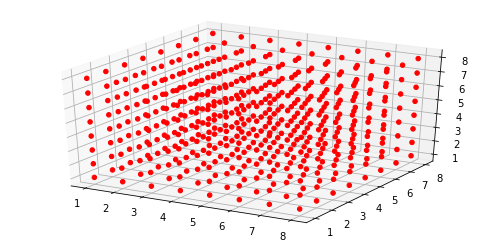

In [67]:
for i1 in range(n1):
    for i2 in range(n2):
        for i3 in range(n3):
            if (A[i1,i2,i3] < 10**(-5)):
                A[i1,i2,i3] = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
x, y, z = A.nonzero()
ax.scatter(x, y, z, c='r', alpha=1)
plt.show()

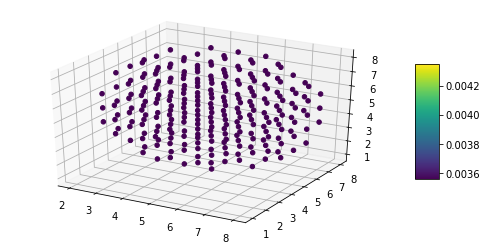

In [43]:
def plot_coord(M):
    k1, k2, k3 = M.shape
    x = np.array([])
    y = np.array([])
    z = np.array([])
    c = np.array([])
    for i1 in range(k1):
        for i2 in range(k2):
            for i3 in range(k3):
                if M[i1,i2,i3] > 10**(-8) :
                    x = np.append(x,i1)
                    y = np.append(y,i2)
                    z = np.append(z,i3)
                    c = np.append(c,M[i1,i2,i3])
    return x,y,z,c




plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z,c = plot_coord(B)
img = ax.scatter(x, y, z, c=c, alpha=1)
cbar = fig.colorbar(img, shrink=0.5, aspect=5)
plt.show()

In [94]:
alpha = 0
mu = Wasserstein_barycentre((A,B), (alpha, 1 - alpha), Ht, a, N = 2)


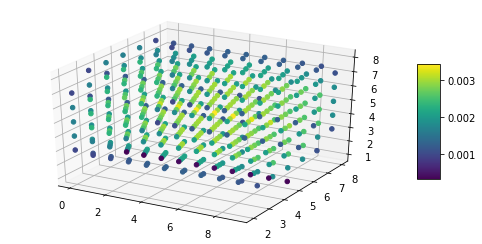

In [95]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z,c = plot_coord(mu)
img = ax.scatter3D(y, x, z, c=c, alpha=1)
cbar = fig.colorbar(img, shrink=0.5, aspect=5)
plt.show()